In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as sklearnLogisticRegression
import pylab as pl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [10]:
X = pd.DataFrame(np.loadtxt("x.dat"))
Y = pd.DataFrame(np.loadtxt("y.dat"))

In [11]:
"""
Implements locally-weighted logistic regression using the Newton-Raphson optimization method.
    reg: Regularization parameter for controlling the model complexity.
    threshold: Convergence threshold for the optimization algorithm.
    tau: Parameter controlling the width of the Gaussian kernel used for weighting.
    w: Weights assigned to each training example based on its distance to the prediction point.
    theta: Model coefficients.
    x: Prediction point.
"""
class locally_weighted_logistic_regression(object):
    
    def __init__(self, tau, reg = 0.0001, threshold = 1e-6):
        self.reg = reg
        self.threshold = threshold
        self.tau = tau
        self.w = None
        self.theta = None
        self.x = None
   
    """
    Computes the weights for each training example based on the Gaussian kernel 
    and the distance to the prediction point.
    """
    def weights(self, x_train, x):
        sq_diff = (x_train - x)**2
        norm_sq = sq_diff.sum(axis = 1)
        return np.ravel(np.exp(- norm_sq / (2 * self.tau**2)))
    
    """
    Computes the logistic function values for the given input.
    """
    def logistic(self, x_train):
        return np.ravel(1 / (1 + np.exp(-x_train.dot(self.theta))))
    
    """
    Trains the model by iteratively updating the coefficients using the Newton-Raphson optimization method.
    """
    def train(self, x_train, y_train, x):
        self.w = self.weights(x_train, x)
        self.theta = np.zeros(x_train.shape[1])
        self.x = x
        gradient = np.ones(x_train.shape[1]) * np.inf
        while np.linalg.norm(gradient) > self.threshold:
            # compute gradient
            h = self.logistic(x_train)
            gradient = x_train.T.dot(self.w * (np.ravel(y_train) - h)) - self.reg * self.theta
            # Compute Hessian
            D = np.diag(-(self.w * h * (1 - h)))
            H = x_train.T.dot(D).dot(x_train) - self.reg * np.identity(x_train.shape[1])
            # weight update
            self.theta = self.theta - np.linalg.inv(H).dot(gradient)
    """
    Predicts the class labels for the given prediction point based on the trained model.
    """
    def predict(self):
        return np.array(self.logistic(self.x) > 0.5).astype(int)

In [17]:
"""
The plot_lwlr function visualizes the results of locally-weighted logistic regression (LWLR) on a two-dimensional dataset. 
It creates a grid of points and applies LWLR to each point to make predictions. 
The function uses a locally_weighted_logistic_regression object to train and predict with LWLR. 
The resulting predictions are displayed as a color mesh on the grid, where different colors represent different predicted classes. 
The original data points are also plotted, with their colors indicating the true classes. 
The function allows for adjusting the parameter tau for LWLR, and it generates a plot to visualize the decision boundary and classification results.
"""
def plot_lwlr(x_train, y_train, tau, res):
    lwlr = locally_weighted_logistic_regression(tau)
    # Setup plotting grid
    xx, yy = np.meshgrid(np.linspace(-1, 1, res), np.linspace(-1, 1, res))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#8EE5EE'])
    # Make predictions
    x = np.zeros(2)
    pred = np.zeros((res, res))
    for i in range(res):
        for j in range(res):
            x[0] = xx[i, j]
            x[1] = yy[i, j]
            lwlr.train(x_train, y_train, x)
            pred[i, j] = lwlr.predict()
    # Plotting
    plt.figure(figsize=(10, 8))  # Set the figure size to a larger value
    plt.pcolormesh(xx, yy, pred, cmap=cmap_light, shading='auto')  # Add shading='auto' to fix the warning
    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train.iloc[:, 0],
                cmap=cmap_bold)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("tight")
    plt.title("tau = " + str(tau))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


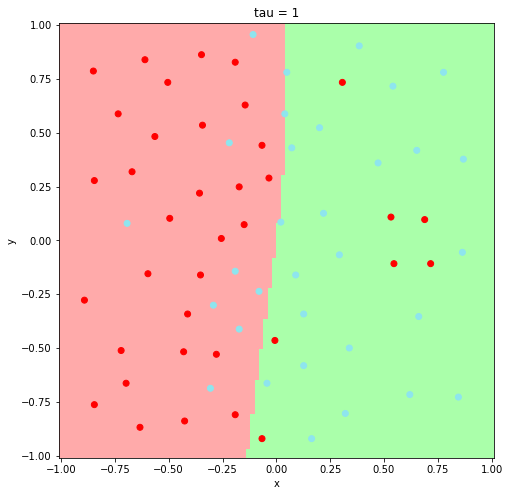

In [18]:
plot_lwlr(X, Y, 1, 100)

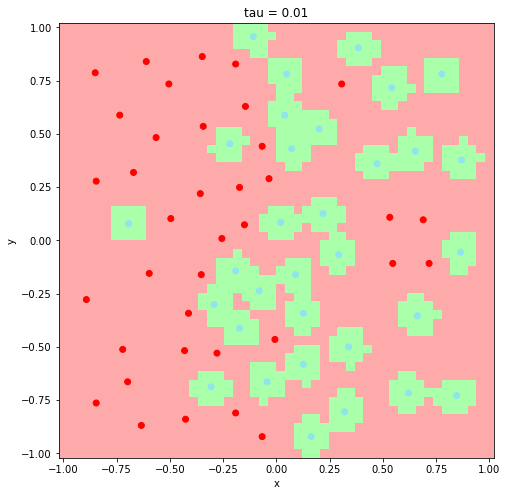

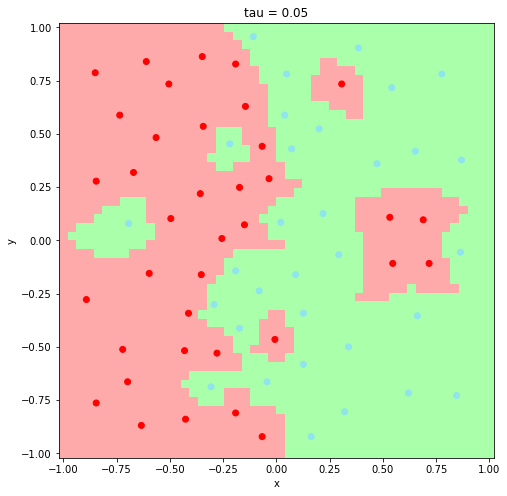

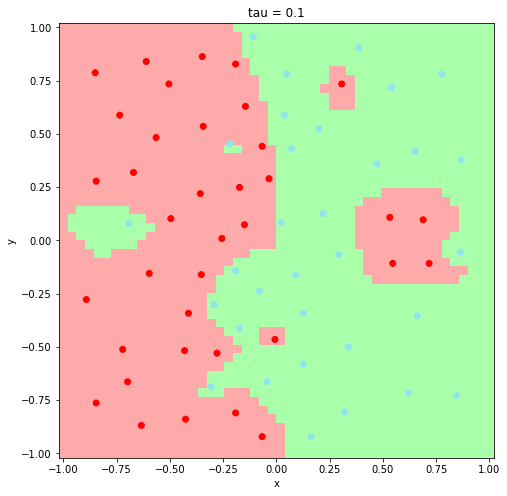

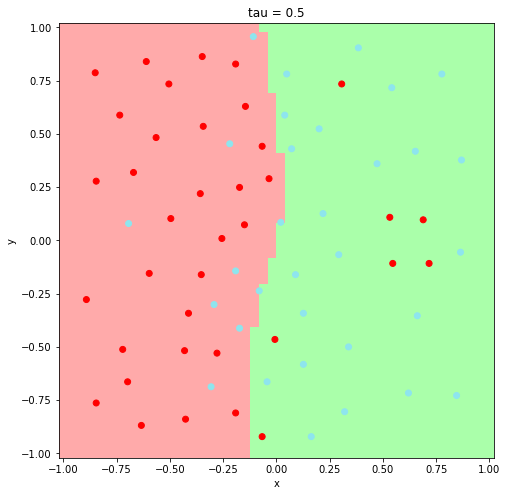

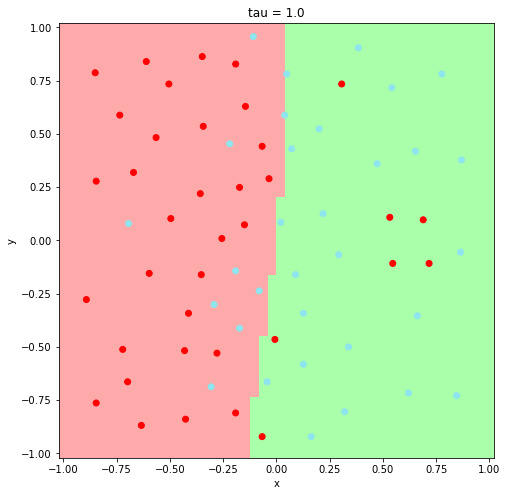

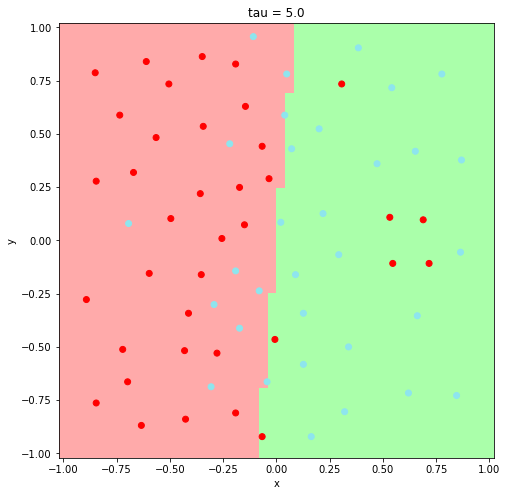

In [14]:
%matplotlib inline
tau = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]

for i in range(1, len(tau) + 1):
    
    plot_lwlr(X, Y, tau[i-1], 50)